#  ROCK-PAPER-SCISSORS

In [1]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
%matplotlib inline

Using TensorFlow backend.


In [2]:
target_width = 50
target_height = 50
target_size = (target_width, target_height)
classes = ['Guilty', 'Not Guilty']
train_path = '/home/aydinnyunus/PycharmProjects/DetectGuilty/training-set/training-set'
test_path = '/home/aydinnyunus/PycharmProjects/DetectGuilty/test-set/test-set'

train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=target_size, classes=classes,  batch_size=20)

Found 73 images belonging to 2 classes.


In [3]:
model = Sequential()

model.add( Conv2D(32, (3, 3), activation='relu', input_shape=(50,50,3)) )
model.add( MaxPooling2D(pool_size=(2,2)) )

model.add( Conv2D(32, (3, 3), activation='relu') )
model.add( MaxPooling2D(pool_size=(2,2)) )

model.add( Flatten() )
model.add( Dense(128, activation='relu') )
model.add( Dense(2, activation='softmax') )

model.compile(Adam(lr=0.00003), loss='categorical_crossentropy', metrics=['accuracy'])

steps_per_epoch = 100
epochs = 2
model.fit_generator(train_batches, steps_per_epoch=steps_per_epoch, epochs=epochs)
model.save('DetectGuilty.h5')

Epoch 1/2
100/100 [==============================] - 40s 404ms/step - loss: 1.3483 - accuracy: 0.8641
Epoch 2/2
100/100 [==============================] - 43s 430ms/step - loss: 4.1170e-04 - accuracy: 1.0000


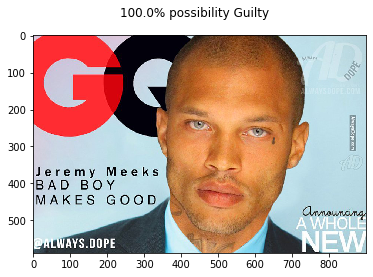

In [4]:
from keras.models import load_model
loaded_model = load_model('DetectGuilty.h5')

def probability_to_percentage(p):
    return round(p*100, 2)

def parse_prediction_array(prediction):
    max_index = prediction[0].argmax()
    if max_index == 0:
        return {"label": "Not Guilty", "p": probability_to_percentage(prediction[0][max_index])}
    else:
         return {"label": "Guilty", "p": probability_to_percentage(prediction[0][max_index])}

img_src = 'Desktop/je.jpg'
img =  cv2.imread(img_src)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width,target_height,3)
prediction = loaded_model.predict(img)

parsed_res = parse_prediction_array(prediction)

fig, ax = plt.subplots()
title =  str(parsed_res["p"]) + "% possibility " + str(parsed_res["label"])
fig.suptitle(title, fontsize=12)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)


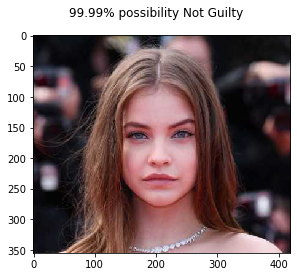

In [5]:
img_src = 'Desktop/barbara.jpg'
img =  cv2.imread(img_src)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width,target_height,3)
prediction = loaded_model.predict(img)

parsed_res = parse_prediction_array(prediction)

fig, ax = plt.subplots()
title =  str(parsed_res["p"]) + "% possibility " + str(parsed_res["label"])
fig.suptitle(title, fontsize=12)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)